# Countries of the World

**Project Outline:**

## Summary of Findings

## About the Data

Source data: https://www.kaggle.com/fernandol/countries-of-the-world

Original: https://www.cia.gov/library/publications/the-world-factbook/

## Imports & Data Reading

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in data
data = pd.read_csv('data/countries_of_the_world.csv', decimal=',')

## Data Checking

In [3]:
# Check first few rows of data
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
# Check shape
print(f'Rows: {data.shape[0]}  |  Columns: {data.shape[1]}')

Rows: 227  |  Columns: 20


In [5]:
# See all column names
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [6]:
# Check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [7]:
# Strip any whitespace from values in country or region
data['Region'] = data['Region'].str.strip()
data['Country'] = data['Country'].str.strip()

Before we move forward with the analysis, let's verify some of the data. We'll look at the demographics of some countries to see if there are any discrepancies.

In [8]:
# Check veracity of data
data.loc[data['Country'].isin(['United Kingdom', 'United States', 'Germany', 'India', 'China'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,667.9,33.85,0.59,65.56,3.0,8.25,10.62,0.009,0.296,0.695
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,543.5,23.46,0.21,76.33,3.0,10.71,10.13,0.005,0.237,0.758
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


With this dataset, we will have to do some research from some outside sources to determine the veracity of the data. Through some external research, the following was found:

* The units for Area should be sq km
* The units for Population Density should be sq km
* Coastline to area ratio is the coastline in km as a percentage of the total area in sq km
* The units for Birthrate are per 1000
* The units for Deathrate are per 1000
* The data is not the most up to date

While the data is not the most up to date, we will still continue with the analysis.

**Sources:** 
* https://www.worldometers.info/demographics/
* https://en.wikipedia.org/
* https://www.cia.gov/library/publications/the-world-factbook/docs/notesanddefs.html
* https://www.cia.gov/library/publications/the-world-factbook/fields/282.html

In [9]:
# Shorten column names to make them easier to work with
data.columns = ([
    "country",
    "region",
    "population",
    "area_sq_km",
    "population_density_sq_km",
    "coastline_area_ratio_%",
    "net_migration",
    "infant_mortality_per_1000",
    "gdp_per_capita_usd",
    "literacy_%",
    "phones_per_1000",
    "arable_%",
    "crops_%",
    "other_%",
    "climate",
    "birthrate_per_1000",
    "deathrate_per_1000",
    "agriculture",
    "industry",
    "service",
])

In [10]:
# Show statistical analysis
data.describe()

,population,area_sq_km,population_density_sq_km,coastline_area_ratio_%,net_migration,infant_mortality_per_1000,gdp_per_capita_usd,literacy_%,phones_per_1000,arable_%,crops_%,other_%,climate,birthrate_per_1000,deathrate_per_1000,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [11]:
# Calculate nulls using percentages of dataset
round(data.isnull().sum() * 100 / len(data),2)

country                      0.00
region                       0.00
population                   0.00
area_sq_km                   0.00
population_density_sq_km     0.00
coastline_area_ratio_%       0.00
net_migration                1.32
infant_mortality_per_1000    1.32
gdp_per_capita_usd           0.44
literacy_%                   7.93
phones_per_1000              1.76
arable_%                     0.88
crops_%                      0.88
other_%                      0.88
climate                      9.69
birthrate_per_1000           1.32
deathrate_per_1000           1.76
agriculture                  6.61
industry                     7.05
service                      6.61
dtype: float64

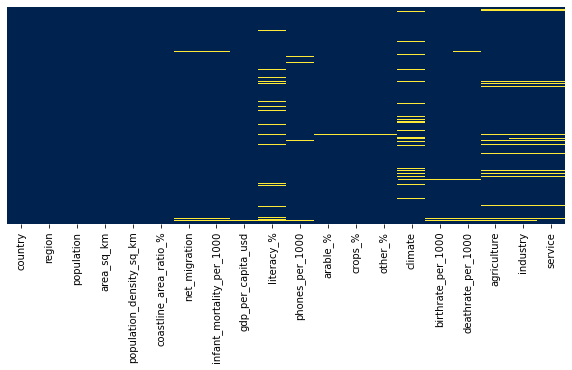

In [12]:
# Visualise missing data
plt.figure(figsize=(10,4))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cividis');

Now lets have a look at some of the distributions of our data.


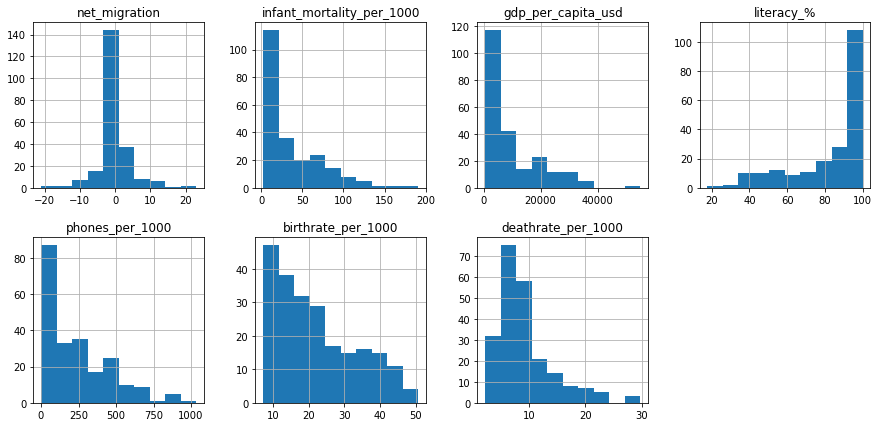

In [13]:
# List of columns for histograms
cols = [
    'net_migration', 
    'infant_mortality_per_1000', 
    'gdp_per_capita_usd', 
    'literacy_%', 
    'phones_per_1000', 
    'birthrate_per_1000', 
    'deathrate_per_1000',
]

# Plot histograms
data.hist(cols, figsize=(15,7), layout=(2,4));

In [14]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

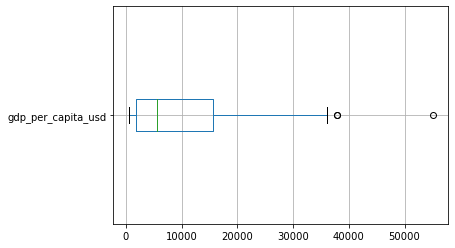

In [15]:
# Boxplot for GDP
data.boxplot(['gdp_per_capita_usd'], vert=False);

In [16]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

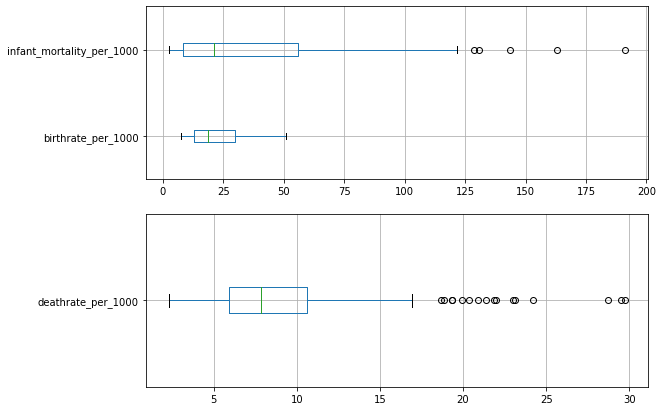

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(9,7))
data.boxplot(['birthrate_per_1000', 'infant_mortality_per_1000'], vert=False, ax=axs[0])
data.boxplot(['deathrate_per_1000'], vert=False, ax=axs[1]);

In [18]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

In [19]:
# Investigating undefined features
data[['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head(10)

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,NaN,0.096,0.658,0.246
6,Anguilla,LATIN AMER. & CARIB,2.0,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,3.0,0.095,0.358,0.547
9,Armenia,C.W. OF IND. STATES,4.0,0.239,0.343,0.418


We can see that agriculture, industry and service are percentages of sector composition. e.g. Afghanistan is comprised of 38% agriculture, 24% industry and 38% service - which totals 100%.

For climate, it is not clear what these units represent so we will have to look a little deeper into this feature.

In [20]:
# Investigating the climate values in more detail
data['climate'].unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

We can see that apart from null climate could be one of 6 values (1, 1.5, 2, 2.5, 3, 4).

After a bit of research, it appears that the dataset classifies climate based closely on the Köppen climate classification. Below are what the following numbers represent:

* 1 - Dry tropical or tundra and ice
* 2 - Wet tropical
* 3 - Temperate humid subtropical and temperate continental
* 4 - Dry hot summers and wet winters
* 1.5 - A mixture of dry and wet tropical
* 2.5 - A mixture of wet tropical and humid subtropical 

Sources:
* https://www.pnas.org/content/101/10/3715.full
* https://www.nationalgeographic.org/encyclopedia/koppen-climate-classification-system/

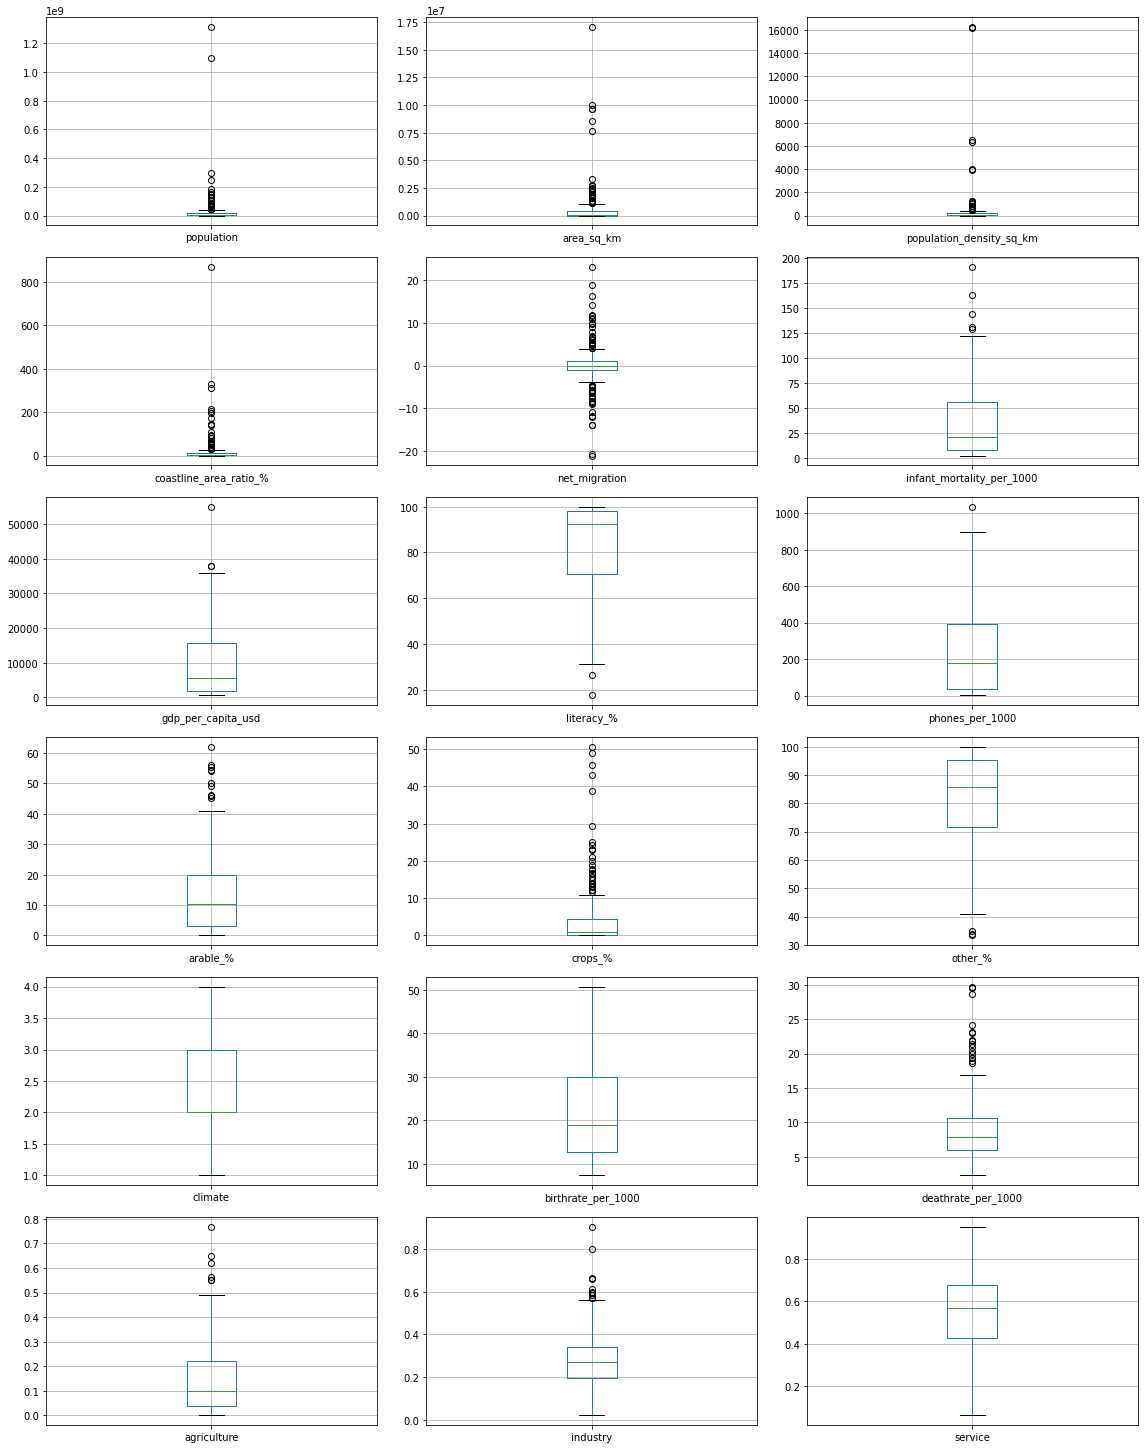

In [21]:
# Check overall outliers before filling null values
fig = plt.figure(figsize=(16,30))
features = list(data.columns[2:])

for i in range(len(features)):
    fig.add_subplot(9, 3, i+1)
    data.boxplot([features[i]])
#     sns.boxplot(y=data[features[i]])
plt.tight_layout()
plt.show()

In [22]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

## Data Cleaning


In [23]:
# See how many nulls per column
data.isnull().sum()

country                       0
region                        0
population                    0
area_sq_km                    0
population_density_sq_km      0
coastline_area_ratio_%        0
net_migration                 3
infant_mortality_per_1000     3
gdp_per_capita_usd            1
literacy_%                   18
phones_per_1000               4
arable_%                      2
crops_%                       2
other_%                       2
climate                      22
birthrate_per_1000            3
deathrate_per_1000            4
agriculture                  15
industry                     16
service                      15
dtype: int64

Explain why I chose each method:

* net migration - only a few values
* infant mortality - only a few values
* gdp - most accurate figure from 2007
* literacy - fill with region **median** due to a few outliers
* phones - fill with region **median** due to a few outliers
* arable - only a few values
* crops - only a few values
* other - only a few values
* climate - fill with region **mode** as climate is likely similar
* birthrate - fill with region **mean** as there are no outliers
* deathrate - fill with region **median** due to many outliers

In [24]:
# Impute values
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality_per_1000'].fillna(0, inplace=True)
data['gdp_per_capita_usd'].fillna(2500, inplace=True)
data['literacy_%'].fillna(data.groupby('region')['literacy_%'].transform('median'), inplace= True)
data['phones_per_1000'].fillna(data.groupby('region')['phones_per_1000'].transform('median'), inplace= True)
data['arable_%'].fillna(0, inplace=True)
data['crops_%'].fillna(0, inplace=True)
data['other_%'].fillna(0, inplace=True)
data['climate'].fillna(data.groupby('region')['climate'].transform(lambda x: x.mode().max()), inplace=True)
data['birthrate_per_1000'].fillna(data.groupby('region')['birthrate_per_1000'].transform('mean'), inplace= True)
data['deathrate_per_1000'].fillna(data.groupby('region')['deathrate_per_1000'].transform('median'), inplace= True)

In [25]:
# Check null values for agriculture, industry and service
data[data['industry'].isnull()][['country', 'region', 'agriculture', 'industry', 'service']]

,country,region,agriculture,industry,service
3,American Samoa,OCEANIA,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,NaN,NaN,NaN
83,Guam,OCEANIA,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,NaN,NaN,NaN
138,Monaco,WESTERN EUROPE,0.17,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,NaN,NaN,NaN
144,Nauru,OCEANIA,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,NaN,NaN,NaN


In [26]:
# Check means for each sector along with sum of row
df_sectors = pd.pivot_table(data, index='region', values=['agriculture', 'industry', 'service'])
df_sectors['sum'] = df_sectors.sum(axis=1)
df_sectors

,agriculture,industry,service,sum
region,,,,
ASIA (EX. NEAR EAST),0.177643,0.302143,0.520107,0.999893
BALTICS,0.045000,0.293333,0.661667,1.000000
C.W. OF IND. STATES,0.192000,0.328000,0.480167,1.000167
EASTERN EUROPE,0.092167,0.309250,0.598667,1.000083
LATIN AMER. & CARIB,0.091023,0.256116,0.650721,0.997860
NEAR EAST,0.063812,0.406000,0.530000,0.999813
NORTHERN AFRICA,0.135000,0.426200,0.432000,0.993200
NORTHERN AMERICA,0.014000,0.199333,0.787000,1.000333
OCEANIA,0.175125,0.215250,0.608937,0.999312


In [27]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

In [28]:
# Assign specific values to countries that have values for at least one sector
data.loc[data['country'] == 'Monaco', 'industry'] = 0.18
data.loc[data['country'] == 'Monaco', 'service'] = 0.65
data.loc[data['country'] == 'Western Sahara', 'agriculture'] = 0.15
data.loc[data['country'] == 'Western Sahara', 'industry'] = 0.45

# We will fill the remaining null values for each sector with the region mean as all of them add up close enough to 100%
data['agriculture'].fillna(data.groupby('region')['agriculture'].transform('mean'), inplace= True)
data['industry'].fillna(data.groupby('region')['industry'].transform('mean'), inplace= True)
data['service'].fillna(data.groupby('region')['service'].transform('mean'), inplace= True)


In [29]:
# Check to see if data has no missing values
data.isnull().sum().sum()

0

## EDA

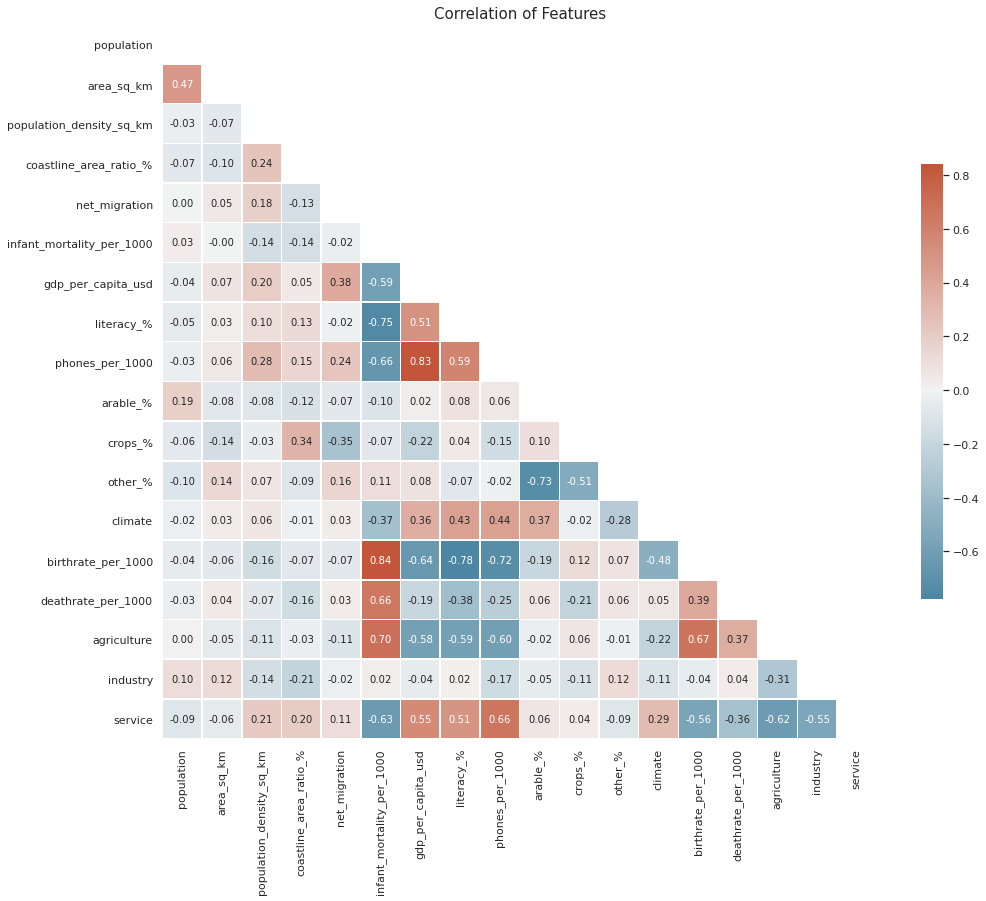

In [30]:
# Correlation
data_corr = data.corr()

sns.set_theme(style="white")

f, ax = plt.subplots(figsize=(16, 16))

mask = np.triu(np.ones_like(data_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlation of Features', fontsize=15)
sns.heatmap(
    data_corr, mask=mask, cmap=cmap, annot=True, fmt='.2f', center=0, 
    square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 10}
);

In [31]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

In [32]:
# Set style for seaborn plots
sns.set(style="darkgrid", palette="muted", font_scale=1)

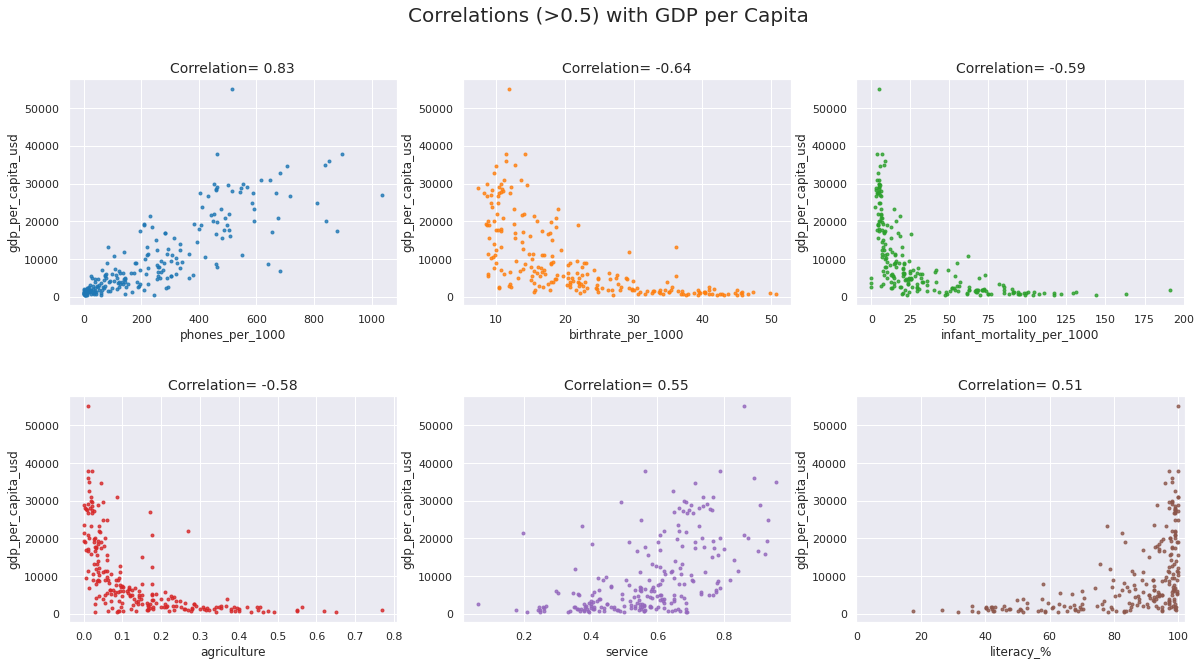

In [33]:
# Plot regplots with features that have correlations with gdp_per_capita over 0.5
fig, axes = plt.subplots(2, 3, figsize=(20,10))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Correlations (>0.5) with GDP per Capita', fontsize=20)

corr_to_gdp = pd.Series(dtype='float64')
for col in data.columns.values[2:]:
    if ((col != 'gdp_per_capita_usd') & (col != 'climate')):
        corr_to_gdp[col] = data['gdp_per_capita_usd'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

palette = sns.color_palette("tab10", len(corr_to_gdp))

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='gdp_per_capita_usd', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.', color=palette[i*3+j])
        title = 'Correlation= ' + str(round(corr_to_gdp[i*3+j],2))
        axes[i,j].set_title(title, fontsize=14)
axes[1,2].set_xlim(0,102)
plt.show()

In [34]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

#### Region

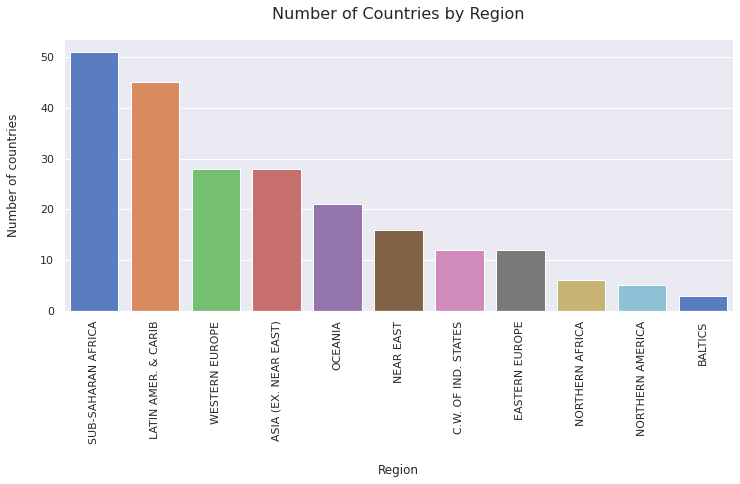

In [35]:
# Show number of countries by region
region = data["region"].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=region.index,y=region.values, palette='muted')
plt.xticks(rotation=90)
plt.ylabel('Number of countries', labelpad=20)
plt.xlabel('Region', labelpad=20)
plt.title('Number of Countries by Region',fontsize=16, pad=20);

In [36]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

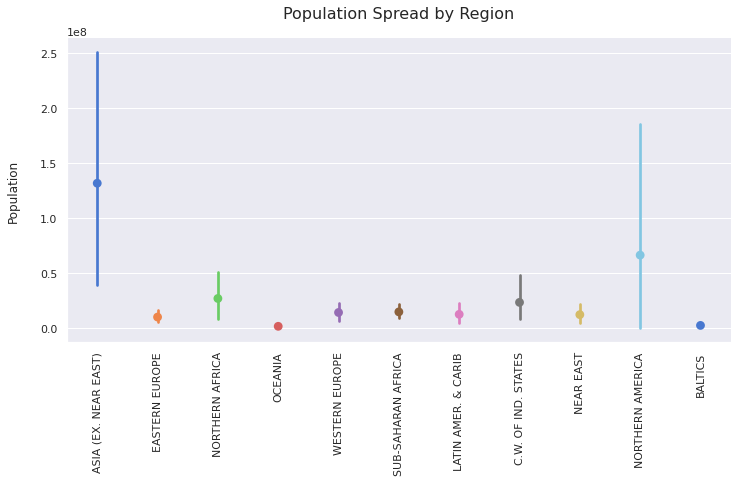

In [37]:
# Show population by region
sns.catplot(x="region",y="population",data=data, color="m", kind="point", palette="muted", height=5, aspect=2)
plt.title('Population Spread by Region', fontsize=16, pad=20)
plt.xlabel('')
plt.ylabel('Population', labelpad=20)
plt.xticks(rotation=90);

In [38]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

#### Climate

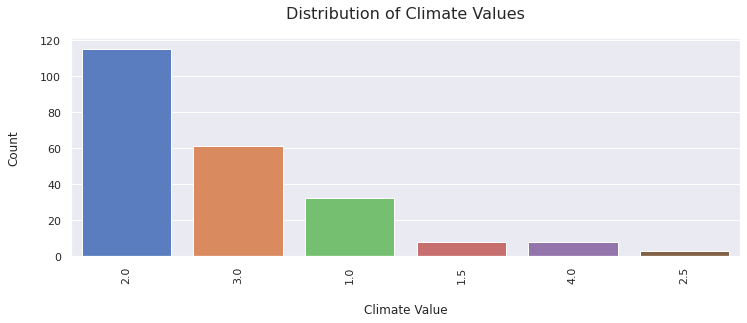

In [39]:
# Show count of climate values
climate = data["climate"].value_counts()

climate.values
plt.figure(figsize=(12,4))
sns.barplot(x=climate.index,y=climate.values, order=climate.index)
plt.xticks(rotation=90)
plt.ylabel('Count', labelpad=20)
plt.xlabel('Climate Value', labelpad=20)
plt.title('Distribution of Climate Values', fontsize=16, pad=20);

In [40]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

#### Sectors

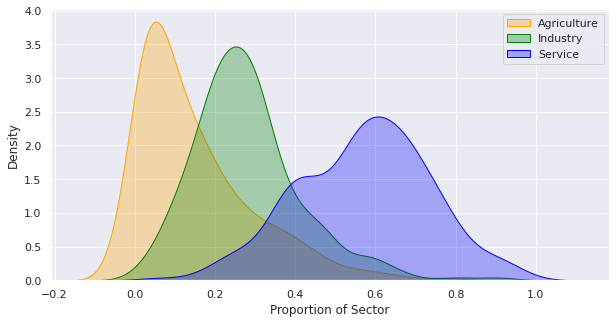

In [41]:
# Proportion of each sector
plt.figure(figsize=(10,5))
sns.kdeplot(data["agriculture"], color='orange',shade=True, alpha=.3, label="Agriculture")
sns.kdeplot(data["industry"], color='green',shade=True, alpha=.3, label="Industry")
sns.kdeplot(data["service"], color='blue',shade=True, alpha=.3, label="Service")
plt.xlabel("Proportion of Sector")
plt.legend();

In [42]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

#### GDP

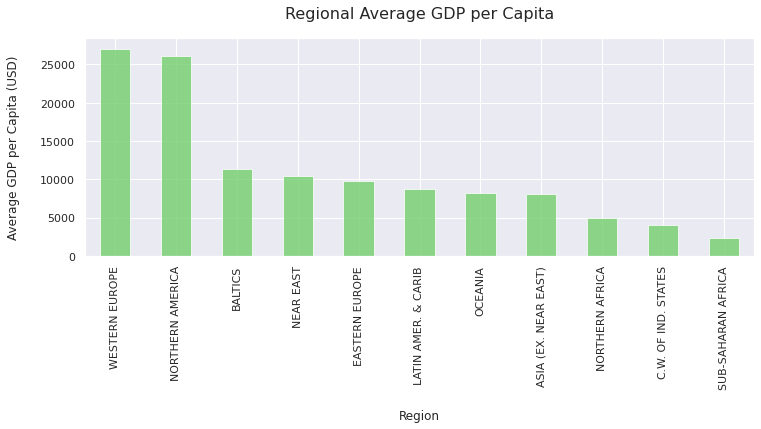

In [43]:
# GDP by region
data.groupby('region')['gdp_per_capita_usd'].mean().sort_values(ascending=False).plot(
    kind='bar', color='g', alpha=0.75, figsize=(12,4))
plt.title('Regional Average GDP per Capita', fontsize=16, pad=20)
plt.xlabel("Region", labelpad=20)
plt.ylabel('Average GDP per Capita (USD)', labelpad=20);

In [44]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

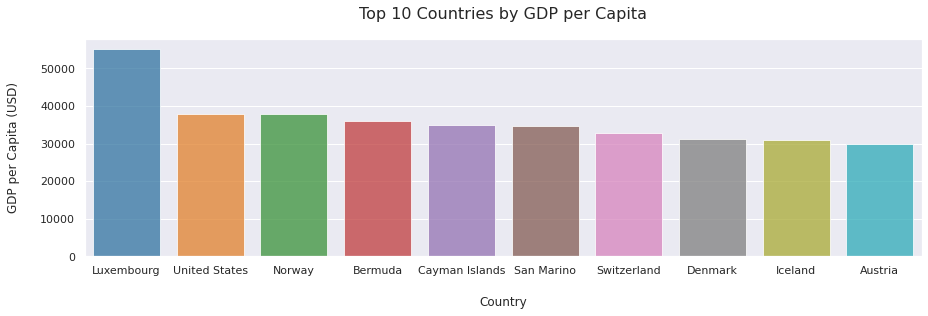

In [45]:
# Top GDP countries
plt.figure(figsize=(15, 4))
top_ten = data.sort_values(['gdp_per_capita_usd'], ascending=False)[['country', 'gdp_per_capita_usd']].head(10)
sns.barplot(x='country', y='gdp_per_capita_usd', data=top_ten, palette='tab10', alpha=0.75)
plt.title('Top 10 Countries by GDP per Capita', fontsize=16, pad=20)
plt.xlabel("Country", labelpad=20)
plt.ylabel('GDP per Capita (USD)', labelpad=20);

In [46]:
# ------------ EXPLAIN THIS --------------------------------------------------------------------------

In [47]:
# Three biggest findings from the EDA phase

## Data Preprocessing


In [48]:
# USE A PIPELINE

In [144]:
# Import statsmodels package


In [278]:
# Get dummies for categorical variables
data_final = pd.get_dummies(data.iloc[:,1:], drop_first=True)
data_final.head()

,population,area_sq_km,population_density_sq_km,coastline_area_ratio_%,net_migration,infant_mortality_per_1000,gdp_per_capita_usd,literacy_%,phones_per_1000,arable_%,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,0,0,0,0,0,0,0,0,0,0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,0,0,1,0,0,0,0,0,0,0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,0,0,0,0,0,1,0,0,0,0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,0,0,0,0,0,0,0,1,0,0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,0,0,0,0,0,0,0,0,0,1


In [279]:
# Find features to use with OLS model

#### Data Splitting

In [280]:
# Import libraries for models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [281]:
# ALL FEATURES, NO SCALING
X = data_final.drop('gdp_per_capita_usd', axis=1)
y = data_final['gdp_per_capita_usd']

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
# ALL FEATURES, SCALING

# ---------------------------------------------------------------------------------------------

X2 = X.copy()
y2 = y.copy()

# Create train/test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

# -----------------------------------------------------------------------------------------------

# Scale Data 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X2_train = sc.fit_transform(X_train)
# X2_test = sc.transform(X_test)
# y2_train = y_train.copy()
# y2_test = y_test.copy()

In [283]:
# SELECTED FEATURES (over 0.3 correlation with gdp), NO SCALING

# Correlations with all features
X_all = data_final[data_final.columns].corr()['gdp_per_capita_usd'].abs().sort_values(ascending=False)[1:]

# Extract all correlations over 0.3
X_selected = X_all[X_all > 0.3]
cols = list(X_selected.index)
X_selected = X[cols]

# Isolate variales
X3 = X_selected
y3 = data_final['gdp_per_capita_usd']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [284]:
# SELECTED FEATURES (over 0.3 correlation with gdp), SCALING

# ---------------------------------------------------------------------------------------------

X4 = X_selected.copy()
y4 = y.copy()

# Create train/test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

# -----------------------------------------------------------------------------------------------

# sc = StandardScaler()
# X4_train = sc.fit_transform(X3_train)
# X4_test = sc.transform(X3_test)
# y4_train = y3_train.copy()
# y4_test = y3_test.copy()

#### Linear Regression - sklearn

In [285]:
# Run linear regressions with subsets of data
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

print('Linear Regression Performance:')
print('-'*30)
print('\nAll Features, No scaling:')
print('MAE:', mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', r2_score(y_test, lm1_pred))
print('-'*30)
print('\nAll Features, with scaling:')
print('MAE:', mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', r2_score(y2_test, lm2_pred))
print('-'*30)
print('\nSelected Features, No scaling:')
print('MAE:', mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', r2_score(y3_test, lm3_pred))
print('-'*30)
print('\nSelected Features, with scaling:')
print('MAE:', mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', r2_score(y4_test, lm4_pred))
print('-'*30)

Linear Regression Performance:
------------------------------

All Features, No scaling:
MAE: 2485.3559793966365
RMSE: 3302.6193129604667
R2_Score:  0.8688325955235205
------------------------------

All Features, with scaling:
MAE: 2485.355979384491
RMSE: 3302.6193129550693
R2_Score:  0.8688325955239492
------------------------------

Selected Features, No scaling:
MAE: 2609.486992768658
RMSE: 3500.408485722494
R2_Score:  0.8526512864949143
------------------------------

Selected Features, with scaling:
MAE: 2609.486992768657
RMSE: 3500.408485722494
R2_Score:  0.8526512864949143
------------------------------


In [298]:
# Create and fit sm model
lr_sm2 = sm.OLS(y2_train, sm.add_constant(X2_train)).fit()
print(lr_sm2.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_per_capita_usd   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     21.95
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           8.37e-40
Time:                        20:19:13   Log-Likelihood:                -1784.5
No. Observations:                 181   AIC:                             3625.
Df Residuals:                     153   BIC:                             3715.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9862.4309    374.350     26.345      0.0

In [368]:
X2_constant = sm.add_constant(X2)

vif = pd.DataFrame()
vif["Features"] = X2_constant.columns
vif["VIF"] = [variance_inflation_factor(X2_constant.values, i) for i in range(X2_constant.shape[1])]
vif[vif['VIF']>5][1:]

,Features,VIF
6,infant_mortality_per_1000,9.944987
13,birthrate_per_1000,8.491015
15,agriculture,544.546137
16,industry,475.906057
17,service,703.976401


In [308]:
X5 = X.copy()
X5 = X5.drop(columns=['industry', 'infant_mortality_per_1000', 'birthrate_per_1000'])
y5 = y.copy()

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

sc = StandardScaler()
X5_train = sc.fit_transform(X5_train)
X5_test = sc.transform(X5_test)

lm5 = LinearRegression()
lm5.fit(X5_train,y5_train)

lm5_pred = lm5.predict(X5_test)

print('MAE:', mean_absolute_error(y5_test, lm5_pred))
print('RMSE:', np.sqrt(mean_squared_error(y5_test, lm5_pred)))
print('R2_Score: ', r2_score(y5_test, lm5_pred))

MAE: 2402.6639093208073
RMSE: 3173.7134073341313
R2_Score:  0.8788720672088612


In [370]:
X5_constant = sm.add_constant(X5)

vif = pd.DataFrame()
vif["Features"] = X5_constant.columns
vif["VIF"] = [variance_inflation_factor(X5_constant.values, i) for i in range(X5_constant.shape[1])]
vif[1:]

,Features,VIF
1,population,1.647511
2,area_sq_km,1.708301
3,population_density_sq_km,1.325105
4,coastline_area_ratio_%,1.461304
5,net_migration,1.397084
6,literacy_%,2.697241
7,phones_per_1000,4.182054
8,arable_%,3.214290
9,crops_%,2.422709
10,other_%,3.836710


In [310]:
# Create and fit sm model
lr_sm5 = sm.OLS(y5_train, sm.add_constant(X5_train)).fit()
print(lr_sm5.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_per_capita_usd   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     24.45
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           3.91e-41
Time:                        21:11:34   Log-Likelihood:                -1786.6
No. Observations:                 181   AIC:                             3623.
Df Residuals:                     156   BIC:                             3703.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9862.4309    375.065     26.295      0.0

In [312]:
# Find feature importance
for i, col in enumerate(X5.columns, 1): 
    print("x"+str(i)+" - "+str(col))

x1 - population
x2 - area_sq_km
x3 - population_density_sq_km
x4 - coastline_area_ratio_%
x5 - net_migration
x6 - literacy_%
x7 - phones_per_1000
x8 - arable_%
x9 - crops_%
x10 - other_%
x11 - climate
x12 - deathrate_per_1000
x13 - agriculture
x14 - service
x15 - region_BALTICS
x16 - region_C.W. OF IND. STATES
x17 - region_EASTERN EUROPE
x18 - region_LATIN AMER. & CARIB
x19 - region_NEAR EAST
x20 - region_NORTHERN AFRICA
x21 - region_NORTHERN AMERICA
x22 - region_OCEANIA
x23 - region_SUB-SAHARAN AFRICA
x24 - region_WESTERN EUROPE


In [341]:
sig_ivs = [(feature, p_value) for feature, p_value in list(zip(list(X5.columns),list(lr_sm5.pvalues[1:])))
           if p_value < 0.05]
sig_ivs

[('net_migration', 0.0005550377200882958),
 ('phones_per_1000', 1.9378442583029088e-12),
 ('other_%', 0.030502982065030573),
 ('agriculture', 0.005374104594651498),
 ('region_LATIN AMER. & CARIB', 0.030658565083082158),
 ('region_WESTERN EUROPE', 0.006720077964733049)]

In [347]:
test = [x for (x, y) in sig_ivs]
test
features_list = list(zip(list(X5.columns),list(lm5.coef_)))
coefs_of_sig_ivs = [y for (x, y) in features_list if x in test]
coefs_of_sig_ivs
importance = coefs_of_sig_ivs

In [358]:
# MAY GET RID OF THIS AS IT DOES NOT SHOW ANYTHING
# importance = lm5.coef_
# feat_impotance_plot = plt.bar([x for x in range(len(importance))], importance)

# feat_impotance_plot[0].set_color('g');

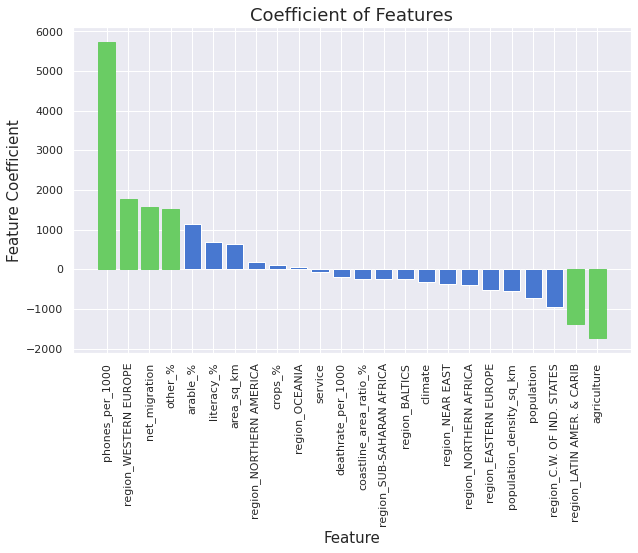

In [357]:
features_list = list(zip(list(X5.columns),list(lm5.coef_)))  
df_features = pd.DataFrame(features_list, columns=['Feature', 'Coefficient'])
# df_features
df_sorted_desc = df_features.sort_values('Coefficient', ascending=False)
plt.figure(figsize=(10,6))
coef_of_features = plt.bar('Feature', 'Coefficient', data=df_sorted_desc)
plt.xticks(rotation=90)
plt.xlabel("Feature", size=15)
plt.ylabel("Feature Coefficient", size=15)
plt.title("Coefficient of Features", size=18)
coef_of_features[0].set_color('g')
coef_of_features[1].set_color('g')
coef_of_features[2].set_color('g')
coef_of_features[3].set_color('g')
coef_of_features[-2].set_color('g')
coef_of_features[-1].set_color('g')

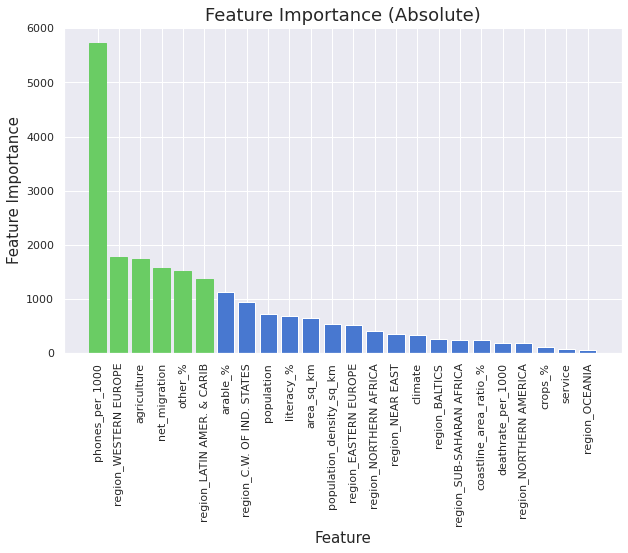

In [356]:
df_features_abs = df_features.copy()
df_features_abs['AbsCoefficient'] = df_features['Coefficient'].abs()

df_abs_desc = df_features_abs.sort_values('AbsCoefficient', ascending=False)
plt.figure(figsize=(10,6))
abs_feature_importance = plt.bar('Feature', 'AbsCoefficient',data=df_abs_desc)
plt.xticks(rotation=90)
plt.xlabel("Feature", size=15)
plt.ylabel("Feature Importance", size=15)
plt.title("Feature Importance (Absolute)", size=18)
for i in range(6):
    abs_feature_importance[i].set_color('g')

In [372]:
# Ridge Regression and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

In [375]:
# Ridge Regression
print("Ridge Regression Performance")
rr = Ridge(alpha=0.01)
rr.fit(X5_train, y5_train) 
ridge_pred = rr.predict(X5_test)

print('MAE:', mean_absolute_error(y5_test, ridge_pred))
print('RMSE:', np.sqrt(mean_squared_error(y5_test, ridge_pred)))
print('R2_Score: ', r2_score(y5_test, ridge_pred))

Ridge Regression Performance
MAE: 2402.4684873290594
RMSE: 3173.531240409952
R2_Score:  0.8788859719739434


Best Linear

MAE: 2402.6639093208073  
RMSE: 3173.7134073341313  
R2_Score:  0.8788720672088612

In [376]:
# Lasso Regression
print("Lasso Regression performance")
lasso_reg = Lasso(alpha=0.01,tol=0.01)
lasso_reg.fit(X5_train, y5_train) 
lasso_pred = lasso_reg.predict(X5_test)

print('MAE:', mean_absolute_error(y5_test, lasso_pred))
print('RMSE:', np.sqrt(mean_squared_error(y5_test, lasso_pred)))
print('R2_Score: ', r2_score(y5_test, lasso_pred))

Lasso Regression performance
MAE: 2402.650222819932
RMSE: 3173.7105666744437
R2_Score:  0.8788722840419759


In [380]:
from sklearn.svm import SVR
svm1 = SVR(kernel='rbf')
svm1.fit(X_train, y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train, y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train, y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train, y4_train)

svm5 = SVR(kernel='rbf')
svm5.fit(X5_train, y5_train)

svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)
svm5_pred = svm5.predict(X5_test)

print('SVM Performance:')
print('-'*30)
print('\nAll Features, No Scaling:')
print('MAE:', mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', r2_score(y_test, svm1_pred))
print('-'*30)
print('\nAll Features, with Scaling:')
print('MAE:', mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', r2_score(y2_test, svm2_pred))
print('-'*30)
print('\nSelected Features, No Scaling:')
print('MAE:', mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', r2_score(y3_test, svm3_pred))
print('-'*30)
print('\nSelected Features, with Scaling:')
print('MAE:', mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', r2_score(y4_test, svm4_pred))
print('-'*30)
print('\nSelected Features, with Scaling, Multicollinearity Removed:')
print('MAE:', mean_absolute_error(y5_test, svm5_pred))
print('RMSE:', np.sqrt(mean_squared_error(y5_test, svm5_pred)))
print('R2_Score: ', r2_score(y5_test, svm5_pred))
print('-'*30)

SVM Performance:
------------------------------

All Features, No Scaling:
MAE: 6380.550819661271
RMSE: 9751.317195340935
R2_Score:  -0.14349813233115616
------------------------------

All Features, with Scaling:
MAE: 6371.703481756956
RMSE: 9742.192813061192
R2_Score:  -0.14135917357645655
------------------------------

Selected Features, No Scaling:
MAE: 6357.03685753276
RMSE: 9730.597547905278
R2_Score:  -0.13864387391698285
------------------------------

Selected Features, with Scaling:
MAE: 6367.8815983423565
RMSE: 9739.183720119954
R2_Score:  -0.14065421412954726
------------------------------

Selected Features, with Scaling, Multicollinearity Removed:
MAE: 6372.49517255562
RMSE: 9742.092983171728
R2_Score:  -0.14133578229719634
------------------------------


In [196]:
# # Create train/test split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# # Scale Data 
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [228]:
### May need to remove this ####
# Check for multicollinearity (VIF)
X_constant = sm.add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = X_constant.columns
vif["VIF"] = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
vif

In [124]:
# Run Linear Regression models on different subsets of the data (use statsmodels OLS)


In [198]:
# Add constant
X_train = sm.add_constant(X_train)

In [199]:
# Create and fit sm model
lr_sm = sm.OLS(y_train, X_train).fit()
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     gdp_per_capita_usd   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     28.95
Date:                Sun, 08 Nov 2020   Prob (F-statistic):           4.98e-43
Time:                        16:46:19   Log-Likelihood:                -1789.4
No. Observations:                 181   AIC:                             3621.
Df Residuals:                     160   BIC:                             3688.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9862.4309    375.983     26.231      0.0

In [205]:
X.columns

Index(['population_density_sq_km', 'net_migration',
       'infant_mortality_per_1000', 'literacy_%', 'phones_per_1000', 'climate',
       'birthrate_per_1000', 'deathrate_per_1000', 'agriculture', 'service',
       'region_BALTICS', 'region_C.W. OF IND. STATES', 'region_EASTERN EUROPE',
       'region_LATIN AMER. & CARIB', 'region_NEAR EAST',
       'region_NORTHERN AFRICA', 'region_NORTHERN AMERICA', 'region_OCEANIA',
       'region_SUB-SAHARAN AFRICA', 'region_WESTERN EUROPE'],
      dtype='object')

In [ ]:
# Run a ridge and lasso regression


In [ ]:
from statsmodels.tools.eval_measures import rmse

# Generate predictions
y_hat = lr_sm.predict(X_test)

# Calc RMSE
rmse = rmse(y_test, y_hat)
print(f'RMSE: {rmse}')

In [ ]:
# Run SVM Model on the data and optimise the parameters for the SVM using GridSearch


In [ ]:
# Run Random Forest Regressor Model and optimise using grid search


In [ ]:
# Use gradient boosting regressor model


In [ ]:
# Build a composite model? -- linear model combined with a non-linear model like random forest

In [224]:
data_final[data_final.columns].corr()['gdp_per_capita_usd'].abs().sort_values(ascending=False)[1:]

phones_per_1000               0.832428
region_WESTERN EUROPE         0.651194
birthrate_per_1000            0.642626
infant_mortality_per_1000     0.587497
agriculture                   0.584342
service                       0.551462
literacy_%                    0.509500
region_SUB-SAHARAN AFRICA     0.394192
net_migration                 0.381599
climate                       0.363919
region_NORTHERN AMERICA       0.246355
crops_%                       0.216853
population_density_sq_km      0.196251
deathrate_per_1000            0.194895
region_C.W. OF IND. STATES    0.133459
other_%                       0.077779
region_NORTHERN AFRICA        0.077178
area_sq_km                    0.072686
coastline_area_ratio_%        0.049963
region_LATIN AMER. & CARIB    0.048450
region_OCEANIA                0.044964
industry                      0.044006
population                    0.038510
region_NEAR EAST              0.021942
arable_%                      0.021341
region_BALTICS           

In [ ]:
# Conclusions
# Include scores from each model in a table so we can understand the differences between the models


In [ ]:
# Future work
